INFO:util.fancy_data_loader:Loading data from data/week_1/PrivacyhubDB.contactsensorstates.json
INFO:util.fancy_data_loader:Loading data from data/week_1/PrivacyhubDB.onoffpluginunitstates.json
INFO:util.fancy_data_loader:Loading data from data/week_2/PrivacyhubDB.contactsensorstates.json
INFO:util.fancy_data_loader:Loading data from data/week_2/PrivacyhubDB.onoffpluginunitstates.json
INFO:util.fancy_data_loader:Loading data from data/week_3/PrivacyhubDB.contactsensorstates.json
INFO:util.fancy_data_loader:Loading data from data/week_3/PrivacyhubDB.onoffpluginunitstates.json
INFO:util.fancy_data_loader:Loading data from data/week_4/PrivacyhubDB.contactsensorstates.json
INFO:util.fancy_data_loader:Loading data from data/week_4/PrivacyhubDB.onoffpluginunitstates.json
INFO:util.fancy_data_loader:Filtered data of 13E56C4E1FD98745 based on actual privacy state: before=838, after=66
INFO:util.fancy_data_loader:Filtered data of 39C0AE0A9852E5EE based on actual privacy state: before=363, after

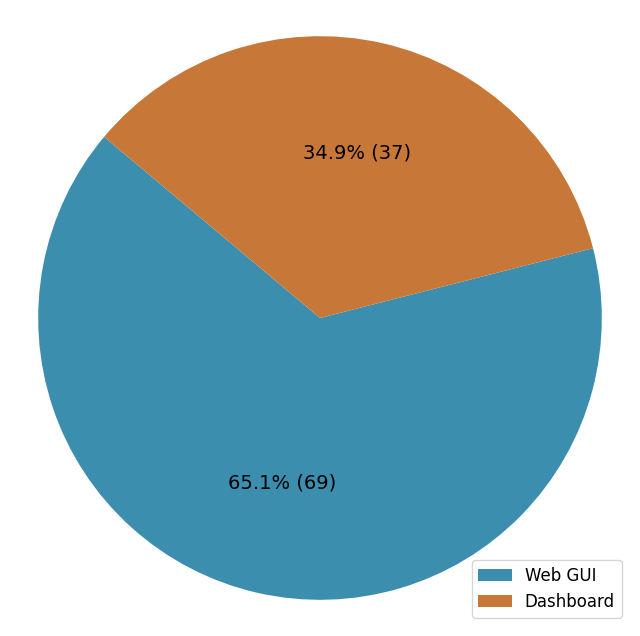

INFO:__main__:Processing week 2
INFO:__main__:Total data points of week 2: 125


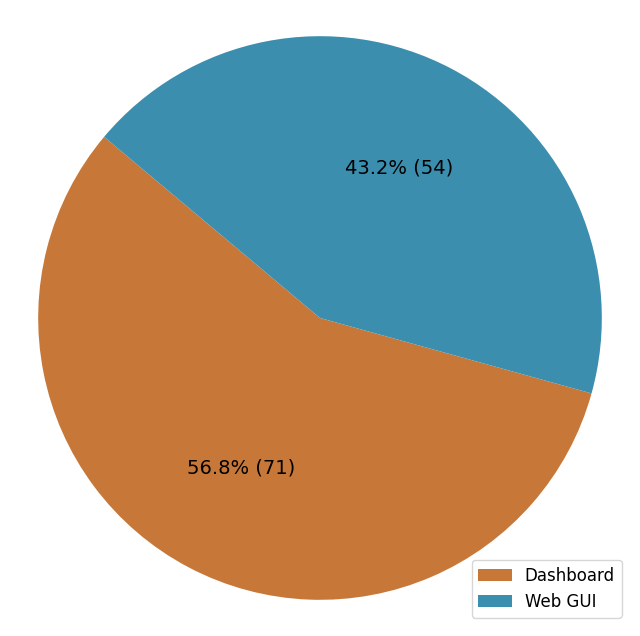

INFO:__main__:Processing week 3
INFO:__main__:Total data points of week 3: 23


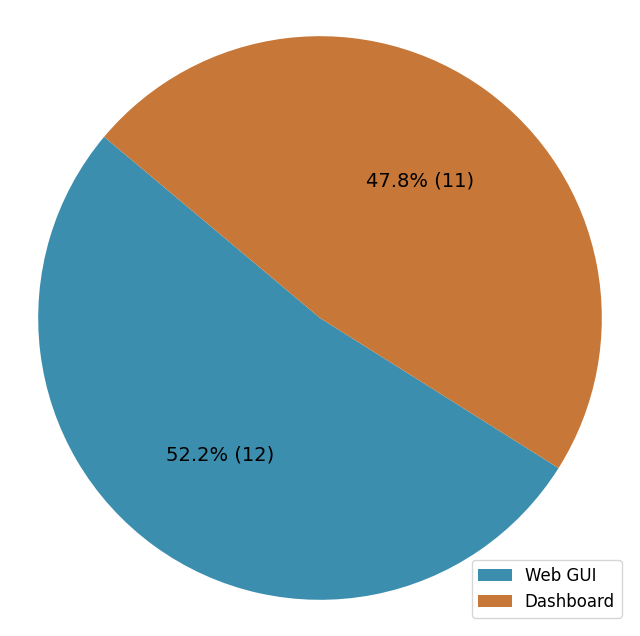

INFO:__main__:Processing week 4
INFO:__main__:Total data points of week 4: 45


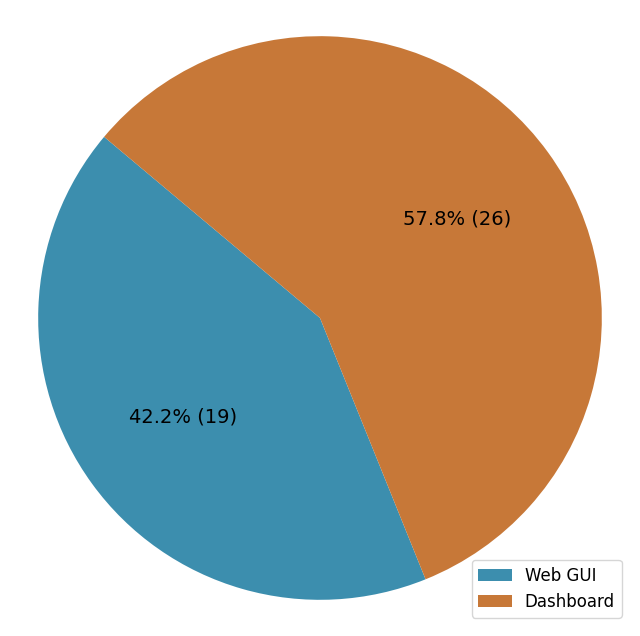

INFO:__main__:Mean output data: {'Web GUI': 0.5067261872208549, 'Dashboard': 0.493273812779145}


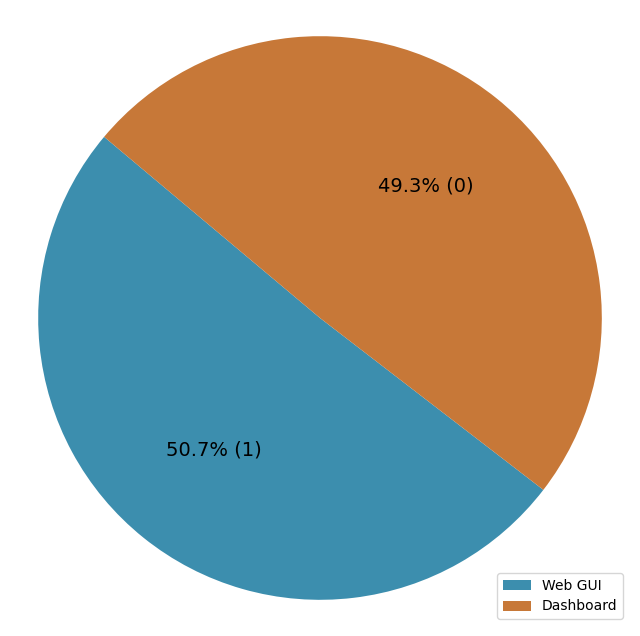

In [3]:
# from util.fancy_data_loader import fancy_load_base_data, fancy_load_data_change_types
import util.fancy_data_loader as data_loader
import json
import logging
import matplotlib.pyplot as plt
from collections import Counter

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Create a mapping dictionary for privacyState values
change_type_mapping = {
    data_loader.ChangeType["PRIVACY_STATE_HUB"]: 'Web GUI',
    data_loader.ChangeType["PRIVACY_STATE_PROXY"]: 'Dashboard',
}

# Create a color mapping dictionary for privacyState values
color_mapping = {
    'Web GUI': '#3c8eae',
    'Dashboard': '#c77838',
}

# Custom function to display the absolute count and percentage
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({val:d})'
    return my_autopct

chosen_weeks = [1, 2, 3, 4]

# Load the data
data = data_loader.fancy_load_data_change_types(weeks=chosen_weeks)

# Used for the big chart
proportion_data = []

# Generate plot for each week seperately
for week, week_data in data.items():
    logger.info(f"Processing week {week}")
    
    # Create a list of all data points
    all_week_data = []
    for unique_id, data_array in week_data.items():
        for data in data_array:
            all_week_data.append(data)
            
    logger.info(f"Total data points of week {week}: {len(all_week_data)}")
    
    # Extract privacyState values
    change_types = [change_type_mapping[item['changeType']] for item in all_week_data]
    
    # Count occurrences of each privacyState
    privacy_state_counts = Counter(change_types)
    
    # For the big chart
    total = sum(privacy_state_counts.values())
    for key, value in privacy_state_counts.items():
        proportion_data.append({
            'week': week,
            'privacy_state': key,
            'count': value,
            'proportion': value / total
        })
    
    # Prepare data for pie chart
    labels = privacy_state_counts.keys()
    sizes = privacy_state_counts.values()
    
    # Get the corresponding colors for each label
    colors = [color_mapping[label] for label in labels]

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 14})
    # plt.title(f'Distribution of Change Location in Week {week}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # Add a legend
    plt.legend(loc='lower right', labels=labels, fontsize='12')
    
    plt.savefig(f'output/state_change_location_week_{week}.pdf', format='pdf')
    plt.show()
    

### Create a big chart

# Calculate the mean over the proportions
output_data_mean = {}
for item in proportion_data:
    if item['privacy_state'] not in output_data_mean:
        output_data_mean[item['privacy_state']] = 0
    output_data_mean[item['privacy_state']] += item['proportion']

for key in output_data_mean:
    output_data_mean[key] /= len(chosen_weeks)
    
logger.info(f'Mean output data: {output_data_mean}')

# Create the pie chart with the output mean
labels = output_data_mean.keys()

# Prepare data for pie chart
sizes = [output_data_mean[label] for label in labels]

# Get the corresponding colors for each label
colors = [color_mapping[label] for label in labels]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Add a legend
plt.legend(loc='lower right', labels=labels)

plt.savefig('output/state_change_location_all.pdf', format='pdf')

plt.show()
